In [118]:
# 数据：https://www.kaggle.com/c/titanic/data
# 参考：
# https://blog.csdn.net/han_xiaoyang/article/details/49797143
# https://www.kesci.com/home/project/5bfe39b3954d6e0010681cd1
# https://blog.csdn.net/ling_mochen/article/details/80219850
# https://tianchi.aliyun.com/notebook-ai/detail?postId=6772
# https://zhuanlan.zhihu.com/p/46447243
# https://blog.csdn.net/Deep___Learning/article/details/103814669

import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("./data/Train.csv")
data_train.tail()

# PassengerId => 乘客ID
# Pclass => 乘客等级(1/2/3等舱位)
# Name => 乘客姓名
# Sex => 性别
# Age => 年龄
# SibSp => 堂兄弟/妹个数
# Parch => 父母与小孩个数
# Ticket => 船票信息
# Fare => 票价
# Cabin => 客舱
# Embarked => 登船港口

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [119]:
# 数据分析
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("./data/Train.csv")
data_train.info()
### 发现训练数据中总共有891名乘客，Cabin有很多缺失值，Age也有一些缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
# 数据分析
# 获取数值型数据分布
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("./data/Train.csv")
data_train.describe()
# mean字段告诉我们，大概0.383838的人最后获救了，2/3等舱的人数比1等舱要多，平均乘客年龄大概是29.7岁(计算这个时候会略掉无记录的)等等…

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


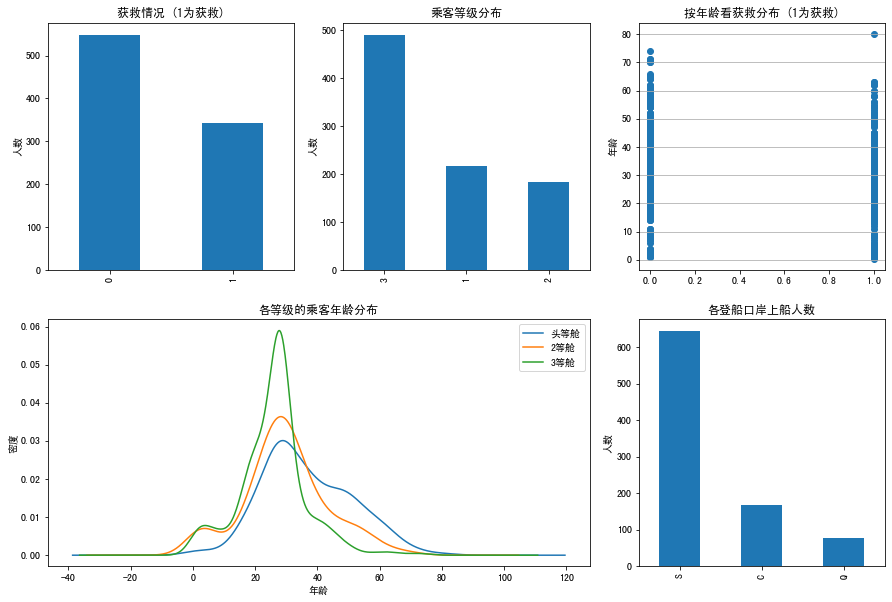

In [127]:
# 数据分析
## 图形化分析
import matplotlib.pyplot as plt

# mac 中文字体设置
# https://mathsyouth.github.io/2019/06/12/macos-matplotlib
# https://blog.csdn.net/sinat_40875078/article/details/104326625
# 指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family'] ='sans-serif'
# 解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title("获救情况 (1为获救)")
plt.ylabel("人数")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel("人数")
plt.title("乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年龄")
plt.grid(b=True, which='major', axis='y')
plt.title("按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")
plt.ylabel("密度")
plt.title("各等级的乘客年龄分布")
plt.legend(('头等舱', '2等舱','3等舱'),loc='best')


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数")
plt.show()


<Figure size 432x288 with 0 Axes>

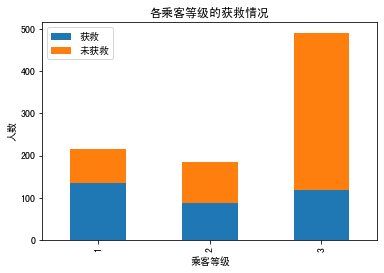

In [9]:
# 数据分析

# 不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样
# 年龄对获救概率也一定是有影响的，毕竟前面说了，副船长还说『小孩和女士先走』呢
# 和登船港口是不是有关系呢？也许登船港口不同，人的出身地位不同？

### 按乘客等级的获救情况

import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("./data/Train.csv")


### 乘客舱的等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = titanic.Pclass[titanic.Survived == 0].value_counts()
Survived_1 = titanic.Pclass[titanic.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("各乘客等级的获救情况")
plt.xlabel("乘客等级")
plt.ylabel("人数")

plt.show()


<Figure size 432x288 with 0 Axes>

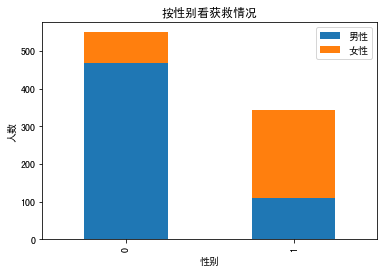

In [10]:
# 数据分析

### 按性别看获救情况
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("./data/Train.csv")

### 看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = titanic.Survived[titanic.Sex == 'male'].value_counts()
Survived_f = titanic.Survived[titanic.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.show()


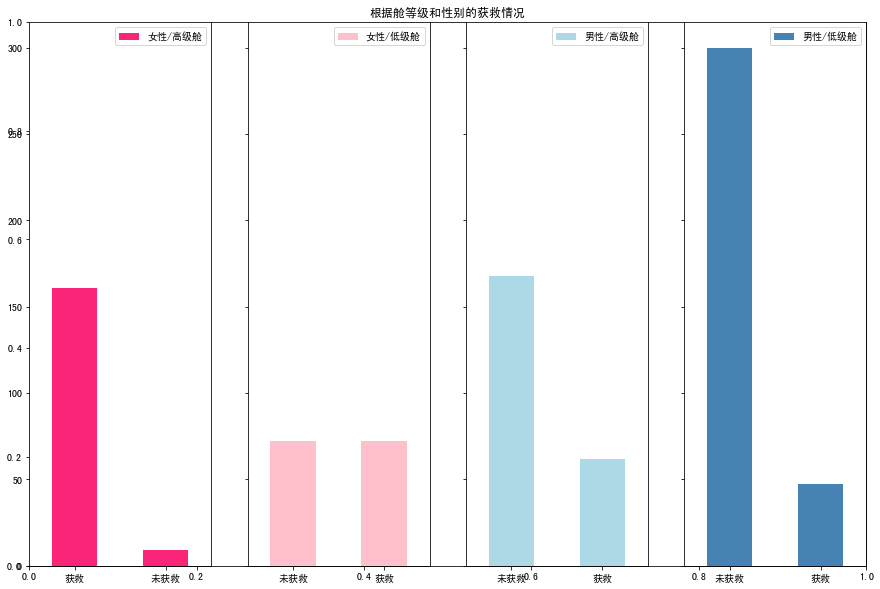

In [12]:
# 数据分析

### 根据舱等级和性别的获救情况
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("./data/Train.csv")

fig=plt.figure(figsize=(15,10))
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
titanic.Survived[titanic.Sex == 'female'][titanic.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
titanic.Survived[titanic.Sex == 'female'][titanic.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
titanic.Survived[titanic.Sex == 'male'][titanic.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
titanic.Survived[titanic.Sex == 'male'][titanic.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()


<Figure size 432x288 with 0 Axes>

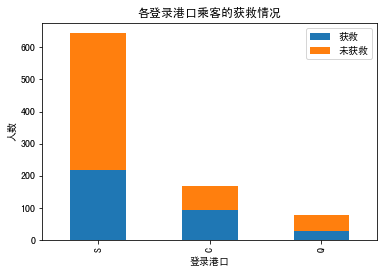

In [13]:
# 数据分析

### 各登录港口乘客的获救情况
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("./data/Train.csv")


#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = titanic.Embarked[titanic.Survived == 0].value_counts()
Survived_1 = titanic.Embarked[titanic.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("各登录港口乘客的获救情况")
plt.xlabel("登录港口")
plt.ylabel("人数")

plt.show()

In [180]:
# 数据处理

import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("./data/Train.csv")

# print(data_train.info())
# print("+" * 50)

# 发现Age中有缺失值，使用平均值填补缺失值
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].median())
# print(data_train.info())

# 数据处理

### 将字符型的值如，性别，上船地点，进行数值替换
# print(data_train['Sex'].unique())
data_train.loc[data_train['Sex'] == 'male','Sex'] = 0
data_train.loc[data_train['Sex'] == 'female','Sex'] = 1
# print(data_train['Sex'].unique())


# print(data_train['Embarked'].unique())
data_train['Embarked'] = data_train['Embarked'].fillna('S')
data_train.loc[data_train['Embarked'] == 'S','Embarked'] = 0
data_train.loc[data_train['Embarked'] == 'C','Embarked'] = 1
data_train.loc[data_train['Embarked'] == 'Q','Embarked'] = 2

# data_train.head()

# 数据处理
### 将Survived：获救与否，作为label值，引入交叉验证后，将label值与特征进行回顾分析

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

## 线性回归模型
predictors = ['Pclass','Age','SibSp','Parch','Fare', 'Sex', 'Embarked']

alg = LinearRegression()
kf = KFold(n_splits=3, shuffle=False, random_state=None)

predictions = []
for train, test in kf.split(data_train[predictors]):
    train_predictors = (data_train[predictors].iloc[train, :])
    train_target = data_train['Survived'].iloc[train]
    alg.fit(train_predictors, train_target)
    test_predictions = alg.predict(data_train[predictors].iloc[test, :])
    predictions.append(test_predictions)
    
predictions = np.concatenate(predictions, axis=0)
predictions[predictions>.5] = 1
predictions[predictions<=.5] = 0
accuracy = sum(predictions == data_train["Survived"]) / len(predictions)
print("线性回归模型 准确率为:", accuracy)

## 逻辑回归模型
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
 
# alg = LogisticRegression(random_state=1)
# scores = cross_val_score(alg, data_train[predictors], data_train["Survived"], cv=3)
# print("逻辑回归模型 准确率为:",scores.mean())

## 随机森林模型
from sklearn.ensemble import RandomForestClassifier
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
scores = model_selection.cross_val_score(alg, data_train[predictors], data_train['Survived'], cv=kf)
print("随机森林模型 准确率为:", scores.mean())


线性回归模型 准确率为: 0.7833894500561167
随机森林模型 准确率为: 0.8260381593714926


In [76]:

import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


data_train = pd.read_csv("./data/Train.csv")

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
# data_train = set_Cabin_type(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
### 逻辑回归建模
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

# y即第0列：Survival结果
y = train_np[:, 0]

# X即第1列及以后：特征属性值
X = train_np[:, 1:]

# fit到LogisticRegression之中
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [186]:
import pandas as pd
import numpy as np


titanic_test = pd.read_csv("./data/test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
 
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2
titanic_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,29.0,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",0,29.0,0,0,359309,8.0500,NaN,0


In [192]:
# # 将数据的Label分离出来
# train_label = df['Survived']
# train_titanic = df.drop('Survived',

# ## 导入测试集的数据，并将数据和测试集上的数据进行一样的处理
# dummies_Embarked = pd.get_dummies(titanic_test['Embarked'], prefix= 'Embarked')
# dummies_Sex = pd.get_dummies(titanic_test['Sex'], prefix= 'Sex')
# dummies_Pclass = pd.get_dummies(titanic_test['Pclass'], prefix= 'Pclass')
# df_test = pd.concat([titanic_test,dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
# df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
# df_test

# # 先用训练集上的数据训练处一个模型，再在测试集上进行预测，并将结果输出到一个csv文件中
# model = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
# model.fit(train_titanic, train_label)
# predictions = model.predict(df_test)
# result = pd.DataFrame({'PassengerId':titanic_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
# result.to_csv("random_forest_predictions.csv", index=False)
# print(pd.read_csv("random_forest_predictions.csv"))
